In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
q = 250 #stb/d

tp = 460 #hrs

Pi = 4412 #psia

h = 69 #ft

phi = 3.9/100

ct = 17E-6 #psi-1

B = 1.136 #rb/stb

mu = 0.8 #cp

rw = 0.198 #ft

In [11]:
df = pd.read_excel('C:\\Users\\Akshay M\\Desktop\\pbt.xlsx')


In [12]:
df.head()

,t,Pwf,delP,dt,dp
0,0.00,4412,0,0.00,0
1,1.60,3812,600,1.60,600
2,1.94,3699,713,0.34,113
3,2.79,3653,759,0.85,76
4,4.01,3636,776,1.22,47


In [14]:
df['delP'] = Pi - df['Pwf']
df

,t,Pwf,delP,dt,dp
0,0.00,4412,0,0.00,0
1,1.60,3812,600,1.60,600
2,1.94,3699,713,0.34,113
3,2.79,3653,759,0.85,76
4,4.01,3636,776,1.22,47
5,6.40,3628,784,1.90,38
6,8.30,3619,793,2.21,28
7,10.90,3606,806,2.82,18
8,12.80,3591,821,3.75,15
9,13.21,3580,832,3.99,14


In [25]:
t = np.array(df['t'])

dt = []
for i in range(len(t)):

  if i==0:
    dt.append(t[i])
  else:
    dt.append(t[i] - t[i-1])

dt = np.array(dt)
df['dt'] = dt
df

,t,Pwf,delP,dt,dp,dP
0,0.00,4412,0,0.00,0,0
1,1.60,3812,600,1.60,600,600
2,1.94,3699,713,0.34,113,113
3,2.79,3653,759,0.85,76,46
4,4.01,3636,776,1.22,47,17
5,6.40,3628,784,2.39,38,8
6,8.30,3619,793,1.90,28,9
7,10.90,3606,806,2.60,18,13
8,12.80,3591,821,1.90,15,15
9,13.21,3580,832,0.41,14,11


In [20]:
p = np.array(df['delP'])

dp = []
for j in range(len(p)):

  if j==0:
    dp.append(p[j])
  else:
    dp.append(p[j] - p[j-1])

dp = np.array(dp)
df['dP'] = dp
dp

array([  0, 600, 113,  46,  17,   8,   9,  13,  15,  11,   7,   6,   6,
         6,   6,   5,   7,   5,   6,   5,   6], dtype=int64)

In [21]:
P_dash = (df['t'][1:])*(df['dP'][1:])/df['dt'][1:]
P_dash

1     600.000000
2     644.764706
3     150.988235
4      55.877049
5      21.422594
6      39.315789
7      54.500000
8     101.052632
9     354.414634
10     84.705882
11     35.793103
12     36.529412
13     35.571429
14     36.489796
15     29.833333
16     41.805556
17     30.294118
18     36.000000
19     29.919355
20     35.879195
dtype: float64

In [26]:
P_del = df['delP'][1:]
P_del

1     600
2     713
3     759
4     776
5     784
6     793
7     806
8     821
9     832
10    839
11    845
12    851
13    857
14    863
15    868
16    875
17    880
18    886
19    891
20    897
Name: delP, dtype: int64

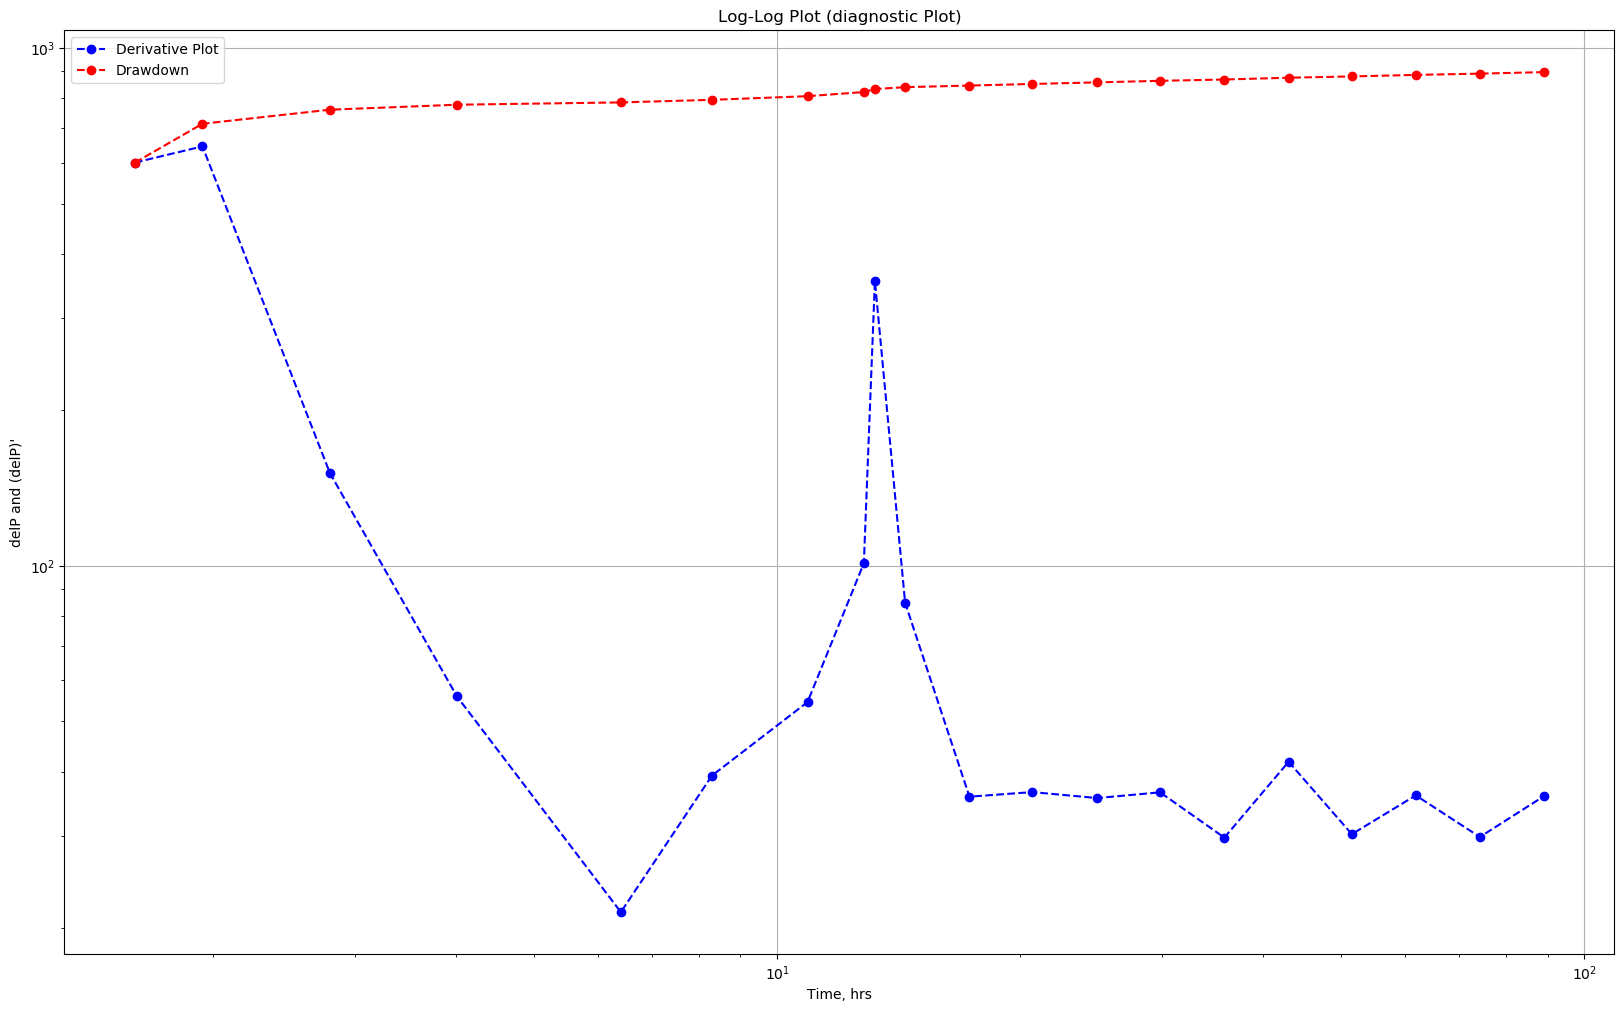

In [27]:
plt.style.use('default')

plt.figure(figsize=(20,12))

plt.loglog(df['t'][1:], P_dash,linestyle='--', marker='o', color='b',label='Derivative Plot')

plt.loglog(df['t'][1:], P_del,linestyle='--', marker='o', color='r',label='Drawdown')

plt.title('Log-Log Plot (diagnostic Plot)')

plt.xlabel('Time, hrs')
plt.ylabel("delP and (delP)'")

plt.legend(loc='best')
plt.grid()

In [28]:
df_IARF = df[(df['t']>=10) & (df['t']<=100)]
df_IARF

,t,Pwf,delP,dt,dp,dP
7,10.90,3606,806,2.60,18,13
8,12.80,3591,821,1.90,15,15
9,13.21,3580,832,0.41,14,11
10,14.40,3573,839,1.19,13,7
11,17.30,3567,845,2.90,6,6
12,20.70,3561,851,3.40,6,6
13,24.90,3555,857,4.20,5,6
14,29.80,3549,863,4.90,6,6
15,35.80,3544,868,6.00,5,5
16,43.00,3537,875,7.20,7,7


In [29]:
df_IARF['logt'] = np.log10(df_IARF['t'])
df_IARF

C:\Users\Akshay M\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,t,Pwf,delP,dt,dp,dP,logt
7,10.90,3606,806,2.60,18,13,1.037426
8,12.80,3591,821,1.90,15,15,1.107210
9,13.21,3580,832,0.41,14,11,1.120903
10,14.40,3573,839,1.19,13,7,1.158362
11,17.30,3567,845,2.90,6,6,1.238046
12,20.70,3561,851,3.40,6,6,1.315970
13,24.90,3555,857,4.20,5,6,1.396199
14,29.80,3549,863,4.90,6,6,1.474216
15,35.80,3544,868,6.00,5,5,1.553883
16,43.00,3537,875,7.20,7,7,1.633468


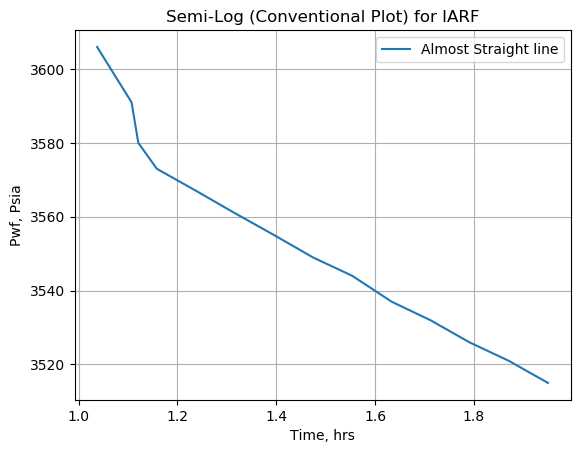

In [33]:
plt.plot(df_IARF['logt'],df_IARF['Pwf'],label='Almost Straight line')

plt.title('Semi-Log (Conventional Plot) for IARF')

plt.xlabel('Time, hrs')
plt.ylabel("Pwf, Psia")

plt.legend(loc='best')
plt.grid()

In [34]:
coeffs = np.polyfit(df_IARF['logt'],df_IARF['Pwf'],1)
coeffs

array([ -87.22653588, 3680.91602423])

In [37]:
m = coeffs[0]
k = abs(162.6*q*mu*B/m/h)
k

6.138060324686079

In [ ]:
#Hence the Natural Absolute Permeability of the reservoir is : 6.138060324686079 md

#AKSHAY MANJRAMKAR